# Project Machine Learning Predictive Analysis - Rival Moh. Wahyudi
Nama : Rival Moh. Wahyudi
Asal : Semarang

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load Data
Data adalah data yang digunakan berasal dari kaggle, dengan judul "Housing Price Prediction".
link dataset: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset

In [2]:
# data yang telah diunduh dari link kaggle akan di load di lokal
# load data yang sudah diunduh dengan pandas 
data = pd.read_csv('Housing.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Understanding
link dataset: https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset
Jumlah Baris : 21613
Jumlah Kolom : 21

In [3]:
# disini menampilkan informasi tentang data
# menampilkan column dan tipe datanya dengan fungsi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

pada dataset ini berjumlah sebanyak 21613 baris dengan kolom berjumlah sebanyak 21
Jumlah Baris : 21613
Jumlah Kolom : 21

Penjelasan Fitur yang ada pada data tersebut adalah sebagai berikut:
- price: harga rumah
- bedrooms: jumlah kamar tidur
- bathrooms: jumlah kamar mandi
- sqft_living: luas tanah
- sqft_lot: luas tanah
- floors: jumlah lantai
- waterfront: lokasi di pantai
- view: tampilan rumah
- condition: kondisi rumah
- grade: kualitas rumah
- sqft_above: luas tanah di atas lantai
- sqft_basement: luas tanah di bawah lantai
- yr_built: tahun pembangunan
- yr_renovated: tahun renovasi
- sqft_living15: luas tanah dalam 15 blok
- sqft_lot15: luas tanah di lot 15 blok
- lat: koordinat latitude
- long: koordinat longitude
- zipcode: kode pos
- id: id rumah
- date: tanggal pembangunan rumah

terdapat fitur fitur yang tidak diperlukan untuk pembangunan model machine learning seperti lat, long, zipcode, id, dan date, pada tahap data preparation akan dihapus fitur tersebut

In [10]:
data.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4.580306e+09,540088.577,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2.876570e+09,367126.825,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1.000102e+06,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2.123049e+09,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [5]:
# Memeriksa Missing Value dengan fungsi isnull() dan isna()
# memeriksa duplikat dengan fungsi duplicated()
print (data.isnull().sum())
print (data.isna().sum())
print (data.duplicated().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
0


Hasil yang di dapat pada proses pemeriksaan data hilang, kosong, dan duplikat adalah sebagai berikut:
Data Hilang : 0
Data Kosong : 0
Data Dublikat : 0

# Exploratory Data Analysis

In [6]:
feature = data.select_dtypes(include=['float64', 'int64', 'int32']).columns
print (feature)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


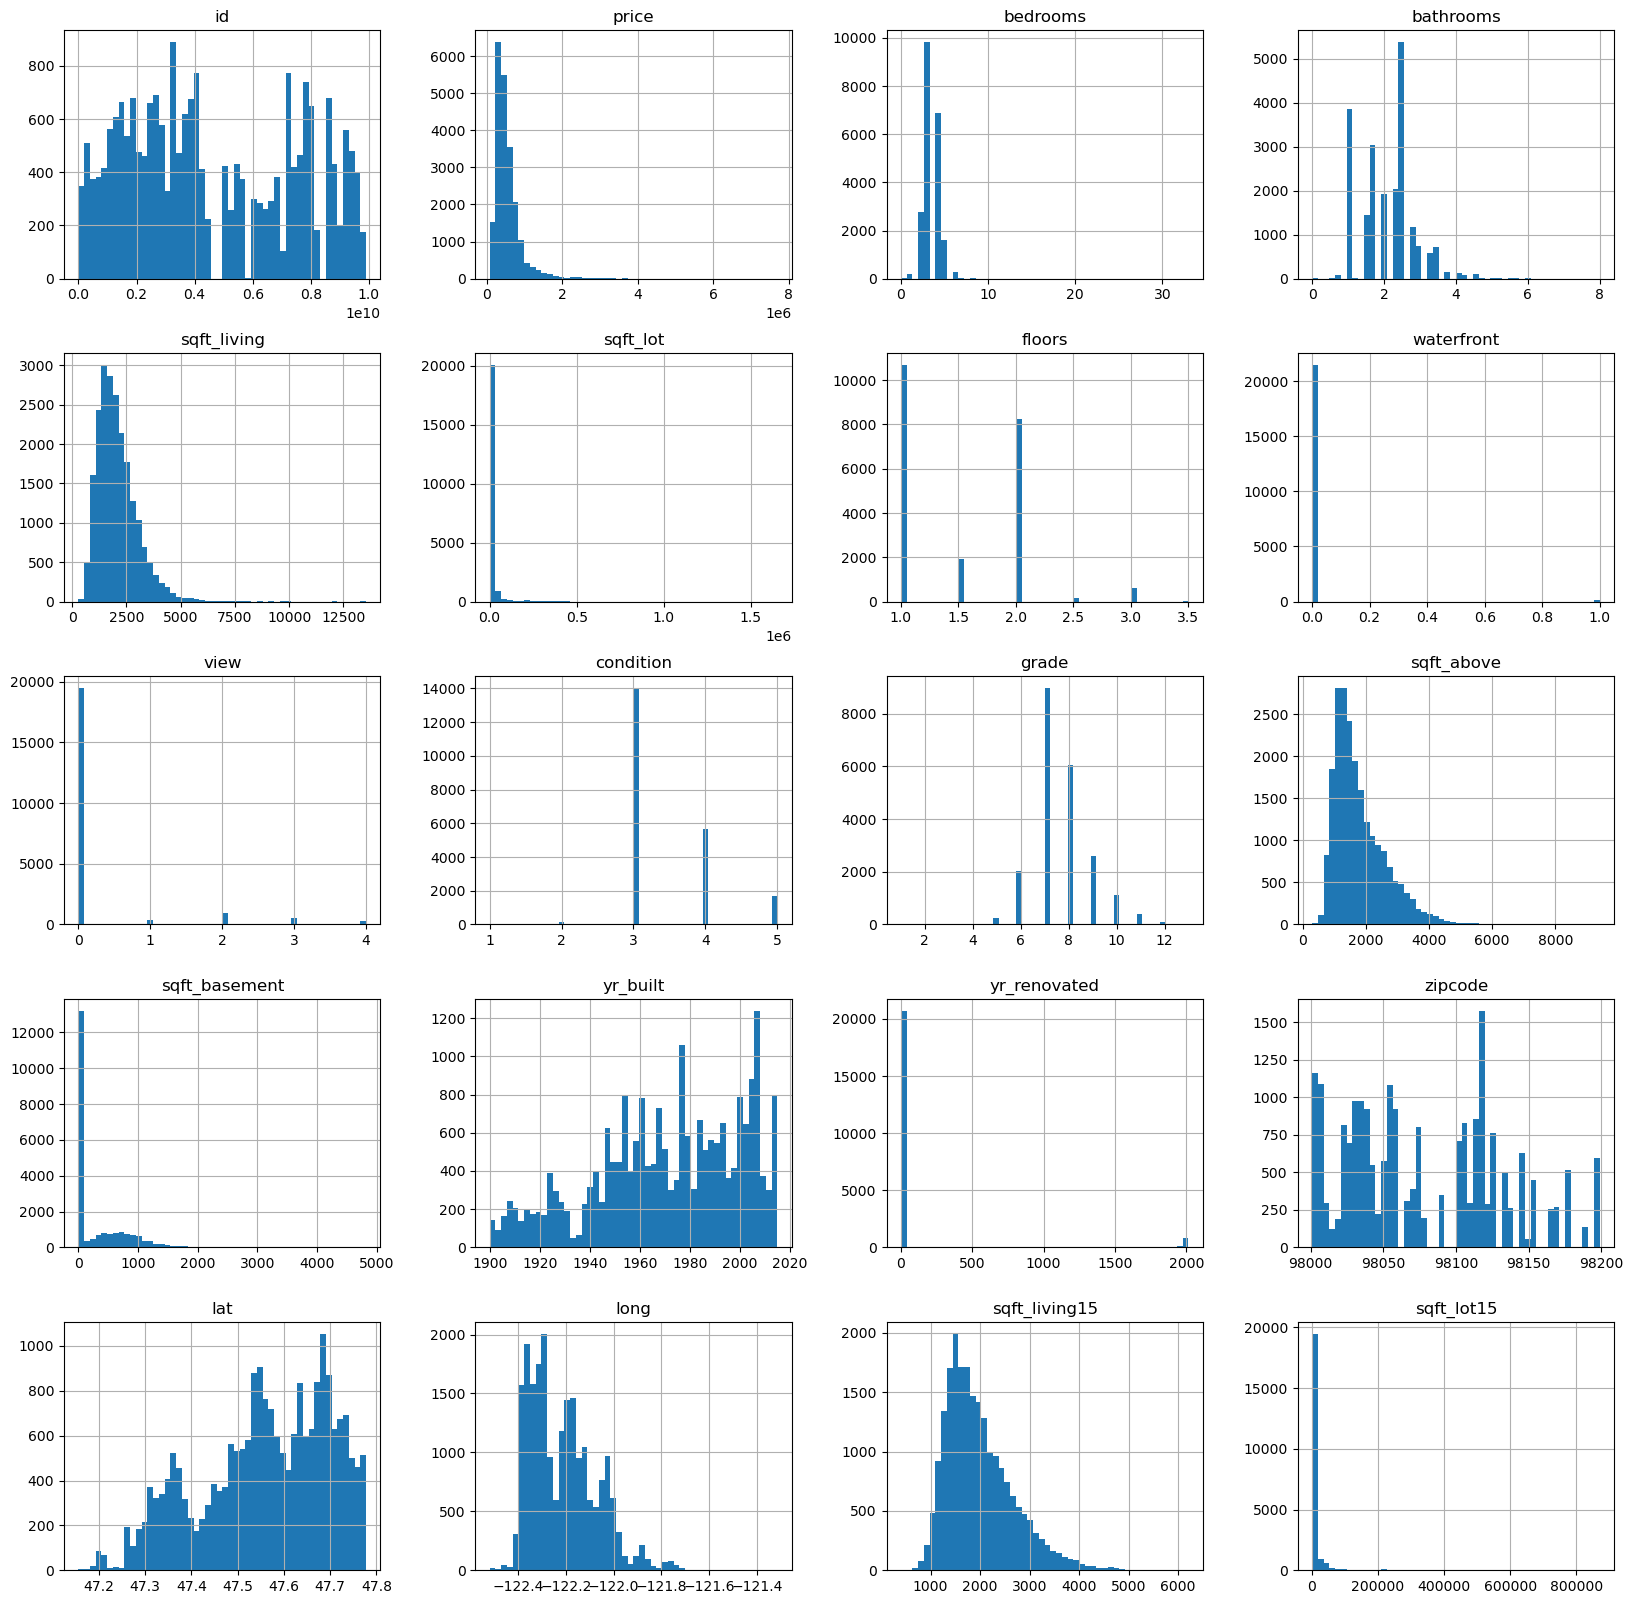

In [7]:
#univariate analysis adalah melakukan analisis pada satu variabel terhadap data tersebut
# Menampilkan persebaran data pada setiap fitur numerik karena kebetulan seluruh fitur bertipe numerik
data[feature].hist(bins = 50, figsize=(20, 20))
plt.show()

pada hasil visualisasi diatas terdapat beberapa fitur yang kebanyakan hanya memiliki satu nilai seperti sqft_lot, view, sqft_lot15, yr_renovated, dan waterfront, jika tetap digunakan akan memengaruhi model machine learning yang akan dibangun, maka pada tahap data preparation akan dihapus fitur tersebut

# Multivariate Analysis
melakukan analisis keterhubungan pada beberapa variabel
disini saya akan melihat corelasi antar setiap fitur terhadap fitur yang lain menggunakan perintah corr()

In [14]:
# menampung seluruh fitur yang bersifat numerik
numerical_features = data.select_dtypes(include=['int64', 'float64', 'int32', 'object']).drop(['id', 'date', 'lat', 'long', 'zipcode'], axis=1).columns
print (numerical_features)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


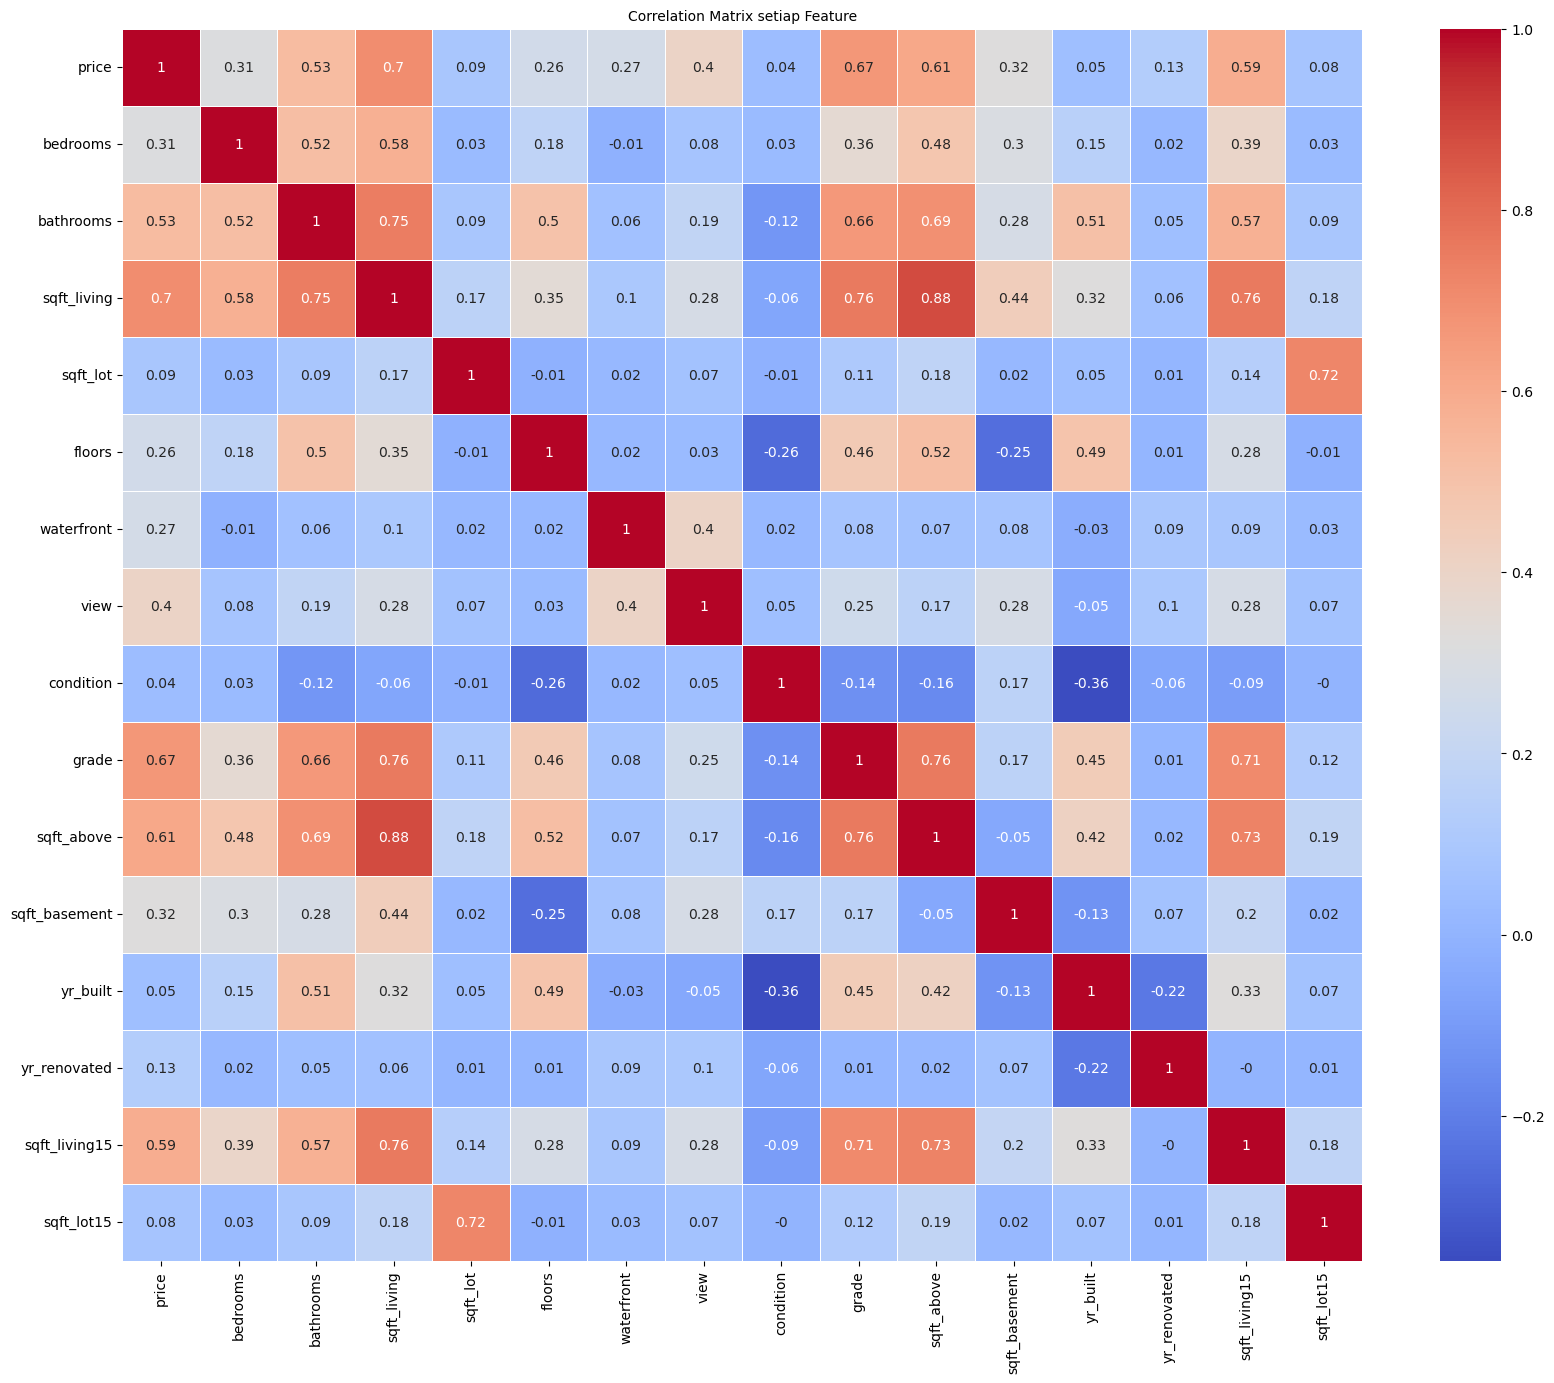

In [16]:
# Menampilkan hasil correlation matrix atau keterhubungan antar fitur dengan fitur lainnya pada data dengan heatmap
plt.figure (figsize=(20, 16))
correlation_matrix = data[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix setiap Feature", size=10)
plt.show()

terlihat dari hasil heatmap diatas terdapat beberapa fitur yang memiliki korelasi yang cukup tinggi pada fitur harga rumah seperti bathrooms, sqft_living, grade, sqft_above, dan sqft_living15. dan juga terdapat beberapa fitur yang memiliki korelasi yang cukup rendah seperti yr_built, condition, sqft_lot, yr_renovated, dan sqft_lot15. data data yang berkorelasi rendah tersebut akan dihapus pada tahap data preparation.

# Data Preparation
1. Drop column/fitur yang tidak terlalu berguna seperti lat, long, zipcode, id, dan date
2. Drop fitur yang tidak terlalu berkorelasi dengan harga seperti condition, sqft_lot, sqft_lot15, yr_built, dan yr_renovated
3. Drop colomn dengan value yang sebagian besar adalah value yang sama seperti view dan waterfront
3. Feature Engineering
4. feature selection
5. train test split
6. scaling

In [17]:
# Mendrop column/fitur yang tidak terlalu berguna seperti lat, long, zipcode, id, dan date
data.drop(['lat', 'long', 'zipcode', 'id', 'date'], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [18]:
# Melakukan pembersihan data yang tidak terlalu berkorelasi dengan harga seperti condition, sqft_lot, sqft_lot15, yr_built, dan yr_renovated
data.drop(['condition', 'sqft_lot', 'sqft_lot15', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15
0,231300.0,2,1.00,1180,1.0,0,0,7,1180,0,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1800


In [19]:
# Melakukan pembersihan pada colum dnegan sebagian besar data dengan nilai yang sama
data.drop(['view', 'waterfront'], axis=1, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,sqft_living15
0,231300.0,2,1.00,1180,1.0,7,1180,0,1340
1,538000.0,3,2.25,2570,2.0,7,2170,400,1690
2,180000.0,2,1.00,770,1.0,6,770,0,2720
3,604000.0,4,3.00,1960,1.0,7,1050,910,1360
4,510000.0,3,2.00,1680,1.0,8,1680,0,1800


# Feature Engineering
menambahkan beberapa feature baru yang tidak terdapat pada data yang asli seperti price_per_sqft dan bedrooms_per_sqft

- bedrooms_per_sqft = bedrooms / sqft_living
- price_per_sqft = price / sqft_living
- bathrooms_per_sqft = bathrooms / sqft_living

In [24]:
data['price_per_sqft'] = data['price'] / data['sqft_living']
data['bedrooms_per_sqft'] = data['bedrooms'] / data['sqft_living']
data['bathrooms_per_sqft'] = data['bathrooms'] / data['sqft_living']

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21613 non-null  float64
 1   bedrooms            21613 non-null  int64  
 2   bathrooms           21613 non-null  float64
 3   sqft_living         21613 non-null  int64  
 4   floors              21613 non-null  float64
 5   grade               21613 non-null  int64  
 6   sqft_above          21613 non-null  int64  
 7   sqft_basement       21613 non-null  int64  
 8   sqft_living15       21613 non-null  int64  
 9   price_per_sqft      21613 non-null  float64
 10  bedrooms_per_sqft   21613 non-null  float64
 11  bathrooms_per_sqft  21613 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [26]:
# Feature selection -> hanya menggunakan fitur yang berkorelasi dengan harga
feature = data.select_dtypes(include=['float64', 'int64', 'int32']).drop(['price'], axis=1).columns
print (feature)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'price_per_sqft', 'bedrooms_per_sqft',
       'bathrooms_per_sqft'],
      dtype='object')


In [27]:
# Data splitting -> 80:20
X = data[feature]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,sqft_living15,price_per_sqft,bedrooms_per_sqft,bathrooms_per_sqft
6325,3,1.75,1780,1.0,9,1780,0,2750,182.584270,0.001685,0.000983
13473,2,1.00,1000,1.0,6,800,200,1270,257.000000,0.002000,0.001000
17614,3,1.00,1080,1.5,6,990,90,1170,211.574074,0.002778,0.000926
16970,3,2.25,2090,1.0,7,1280,810,1800,137.799043,0.001435,0.001077
20868,2,2.50,1741,2.0,8,1446,295,2090,275.129236,0.001149,0.001436


In [28]:
# Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print (X_train_scaled)
print (X_test_scaled)

[[-0.39517837 -0.47445144 -0.32393262 ... -0.74065696 -0.19109967
  -0.30327486]
 [-1.46881667 -1.45258323 -1.18365301 ... -0.06378187  0.34778396
  -0.25027437]
 [-0.39517837 -1.45258323 -1.09547656 ... -0.47696975  1.68002403
  -0.48321482]
 ...
 [-0.39517837  0.50368036  0.05081729 ...  0.06561961 -0.6540893
   0.31339758]
 [-2.54245496 -1.77862716 -1.8670205  ...  3.46301827  1.42960297
   2.81166658]
 [ 0.67845992  0.50368036  1.16404497 ... -1.48601989 -0.88899208
  -0.88323237]]
[[ 0.67845992  0.17763643 -0.00429299 ... -0.79755854  0.231937
   0.02317747]
 [ 1.75209821  1.15576822  0.91053768 ...  0.3116576  -0.12473469
  -0.14183657]
 [ 0.67845992  0.50368036  1.86945657 ...  0.10295948 -1.26059682
  -1.30962823]
 ...
 [ 0.67845992  0.50368036  0.39690986 ... -1.3363727  -0.26305414
  -0.16500323]
 [ 0.67845992 -0.47445144  0.19410402 ...  0.0443578  -0.03285606
  -0.94909572]
 [ 0.67845992  0.50368036  0.54680982 ... -1.13967704 -0.41201499
  -0.33592757]]


# Training dan Evaluation
disini saya akan melakukan training dan evaluation terhadap beberapa model
1. Linear Regression
2. Random Forest
3. Gradient Boosting 

In [29]:
# Model : penampungan model pada dictionary
# setiap model menggunakan settingan default
models = {
    'LinearRegression' : LinearRegression(),
    'RandomForestRegressor' : RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor' : GradientBoostingRegressor(random_state=42)
}

model model diatas memiliki cara kerja nya sendiri seperti berikut:
1. Linear Regression melakuka prediksi dengan cara mengasumsikan antara variable input dengan variable output seperti garis lurus rumusnya adalah y = m * x + b dimana m adalah slope(mengukur pengaruh setiap fitur terhadap variable output) dan b adalah intercept (menggeser garis ke atas/bawah sesuai dengan nilai intercept)
algoritma meminimilakan error dengan menemukan m dan b yang terbaik menggunakan motode seperti Ordinary Least Squares (OLS)

2. Random Forest algoritma dengan cara kerja membuat banyak pohon keputusan (decision tree) dari data pelatihan dengan proses bagging, selanjutnya setiap pohon dilatih pada subset data yang berbeda dengan fitur yang dipilih secara acak. dalam regresi hasil prediksi yang dihasilkan adalah rata-rata dari hasil prediksi dari setiap pohon. pengacakan data da fitur secara acak dapat mengurangi bias dan menghindari overfitting.

3. Gradient Boosting bekerja dega cara memulai degan model yang sederhana seperti decision tree yang kecil, setelah pelatihan dilakukan maka modle baru dilatih unutk memperbaiki error dari model, jadi setiap iterasi akan membuat model baru yang akan memperbaiki error dari model sebelumnya. hasil prediksi yang dihasilkan adalah hasil akhir dari semua model.

In [30]:
# digunakan untuk menyimpan hasil evaluasi model yang akan dilakukan
results = {}

In [31]:
# menggunakan perulangan untuk melatih model dan melakukan evaluasi prediksi model yang selanjutnya hasilnya kaan disimpan pada variabel results
for name, model in models.items():
    # melatih model
    model.fit(X_train_scaled, y_train)
    #melakukan prediksi
    y_pred = model.predict(X_test_scaled)
    
    #melakukan evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # menyimpan hasil
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    # menampilkan hasil
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")


LinearRegression Results:
MSE: 18798213017.11
RMSE: 137106.58
R2 Score: 0.8757

RandomForestRegressor Results:
MSE: 840000489.21
RMSE: 28982.76
R2 Score: 0.9944

GradientBoostingRegressor Results:
MSE: 577597025.87
RMSE: 24033.25
R2 Score: 0.9962


dari hasil yang telah didapat diatas dapat dilihat bahwa model yang memiliki hasil evaluasi terbaik adalah model Gradient Boosting dengan hasil evaluasi MSE, RMSE, dan R2 Score yang paling tinggi. disini meskipun model menggunakan settingan default namun hasilnya cukup baik untuk dapat dilakukan prediksi harga rumah ini sudah sesua dengan goals yang ditetapkan yaitu dapat memprediksi harga rumah dengan akurasi yang baik dan juga fitur fitur apa saja yang mempengaruhi harga rumah. yaitu